# Install dependencies

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

# Download dataset

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto')

In [3]:
mnist.data.shape

(70000, 784)

In [27]:
X = mnist.data.to_numpy() / 255.0
y = pd.get_dummies(mnist.target).to_numpy().astype(int)

# Split data into train and test set

In [28]:
train_ratio = 0.8
p = int(train_ratio * X.shape[0])

X_train = X[:p]
X_test = X[p:]
y_train = y[:p]
y_test = y[p:]

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (56000, 784)
y_train.shape: (56000, 10)
X_test.shape: (14000, 784)
y_test.shape: (14000, 10)


# Define functions

In [29]:
# Logistic Regression

def predict(weights, feature): # Sigmoid
    z = np.dot(feature, weights)
    return 1 / (1 + np.exp(-z))

def calculate_loss(predictions, actual_values): # Binary cross entropy loss
    epsilon = 1e-15 # prevent log(0)
    return - np.mean((actual_values * np.log(predictions + epsilon) + (1 - actual_values) * np.log(1 - predictions + epsilon)))

def calculate_gradient(feature_matrix, predictions, actual_values):
    return np.dot(feature_matrix.T, predictions - actual_values) / len(predictions)

In [30]:
def gradient_descent(X_train, y_train, X_test, y_test, batch_size=32, epochs=10, learning_rate=0.01):

	n, m = X_train.shape
	o = y_train.shape[-1]

	# initialize random weights
	weights = np.random.rand(m, o)

	# START TRAINING
	for epoch in range(epochs):
		train_loss = 0
		for iteration in range(0, n, batch_size):
			batch_start = iteration
			batch_end = iteration + batch_size

			x_batch = X_train[batch_start:batch_end]
			y_batch = y_train[batch_start:batch_end]

			predictions = predict(weights, x_batch)

			gradient = calculate_gradient(x_batch, predictions, y_batch)
			weights -= learning_rate * gradient
			
			batch_loss = calculate_loss(predictions, y_batch)
			train_loss += batch_loss

		# START VALIDATING
		predictions = predict(weights, X_test)
		test_loss = calculate_loss(predictions, y_test)

		print(f"epoch {epoch+1}/{epochs} | Train Loss {train_loss} | Test Loss {test_loss}")

	return weights

In [34]:
def metrics(preds, y_true):
	# True Positives, False Positives, False Negatives
	tp = np.sum((preds == 1) & (y_true == 1))
	fp = np.sum((preds == 1) & (y_true == 0))
	fn = np.sum((preds == 0) & (y_true == 1))
	
	accuracy = np.sum(preds == y_true) / len(y_true)
	precision = tp / (tp + fp) if (tp + fp) != 0 else 0
	recall = tp / (tp + fn) if (tp + fn) != 0 else 0
	f1score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
	
	return accuracy, precision, recall, f1score

# Train

In [35]:
weights = gradient_descent(
	X_train, y_train,
	X_test, y_test,
	batch_size=32,
	epochs=10,
	learning_rate=0.01,
)

epoch 1/10 | Train Loss 4065.2731085825394 | Test Loss 0.2308220804302492
epoch 2/10 | Train Loss 348.512265328198 | Test Loss 0.15891512674117408
epoch 3/10 | Train Loss 275.32896703224344 | Test Loss 0.13554119307011397
epoch 4/10 | Train Loss 244.871155849076 | Test Loss 0.12337629172983187
epoch 5/10 | Train Loss 227.07564015360987 | Test Loss 0.11567583981973865
epoch 6/10 | Train Loss 215.00999379770826 | Test Loss 0.1102527084894912
epoch 7/10 | Train Loss 206.1159023996321 | Test Loss 0.1061704463614433
epoch 8/10 | Train Loss 199.19864718798817 | Test Loss 0.10295512492540712
epoch 9/10 | Train Loss 193.61507191872897 | Test Loss 0.10033867220879529
epoch 10/10 | Train Loss 188.98351308900365 | Test Loss 0.09815667379286393


# Evaluate

In [75]:
preds = predict(weights, X_test)
for i in range(preds.shape[0]):
    max_index = np.argmax(preds[i])
    preds[i] = np.where(preds[i] == preds[i][max_index], 1, 0)

results = []
for i in range(10):
    result = metrics(preds[:, i], y_test[:, i])
    results.append(result)
results.append(np.mean(results, axis=0))

In [78]:
pd.DataFrame(results,
			columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
			index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'Avg'])

,Accuracy,Precision,Recall,F1 Score
0,0.989929,0.933193,0.966497,0.949553
1,0.990857,0.958042,0.960484,0.959262
2,0.979929,0.925871,0.873427,0.898884
3,0.976357,0.872590,0.896674,0.884468
4,0.981500,0.898076,0.915698,0.906801
5,0.970643,0.868007,0.792498,0.828536
6,0.988429,0.934959,0.944735,0.939822
7,0.982071,0.920765,0.908968,0.914829
8,0.965571,0.798917,0.864469,0.830401
9,0.972714,0.873074,0.850608,0.861694


# Infer

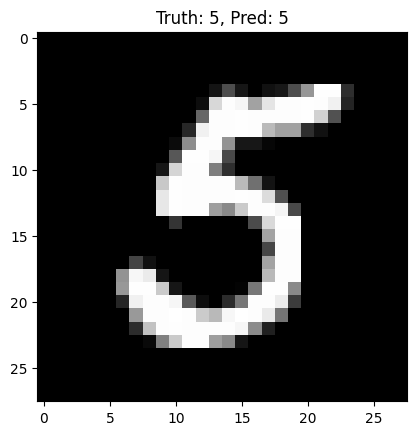

In [48]:
import random

index = random.randint(0, len(y_test))

plt.title(f'Truth: {np.argmax(y_test[index])}, Pred: {np.argmax(preds[index])}')
plt.gray()
plt.imshow(X_test[index].reshape(28, 28))
plt.show()